In [2]:
## Import

In [3]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

Matplotlib is building the font cache; this may take a moment.
Using TensorFlow backend.


In [5]:
df=pd.read_csv("TSLA.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,262.220001,263.000000,257.820007,259.149994,259.149994,2610900
1,2015-07-13,262.250000,262.549988,256.049988,262.160004,262.160004,2960300
2,2015-07-14,262.100006,265.989990,260.510010,265.649994,265.649994,1907600
3,2015-07-15,266.739990,267.489990,262.079987,263.140015,263.140015,2021600
4,2015-07-16,264.220001,267.200012,263.160004,266.679993,266.679993,1616000


In [6]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [7]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [8]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
740/740 [==============================] - 5s 7ms/step - loss: 0.0625
Epoch 2/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0166
Epoch 3/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0129
Epoch 4/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0136
Epoch 5/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0117
Epoch 6/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0116
Epoch 7/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0115
Epoch 8/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0106
Epoch 9/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0114
Epoch 10/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0097
Epoch 11/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0096
Epoch 12/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0094
Epoch 13/100


740/740 [==============================] - 3s 3ms/step - loss: 0.0029
Epoch 100/100
740/740 [==============================] - 2s 3ms/step - loss: 0.0031


In [9]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [10]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

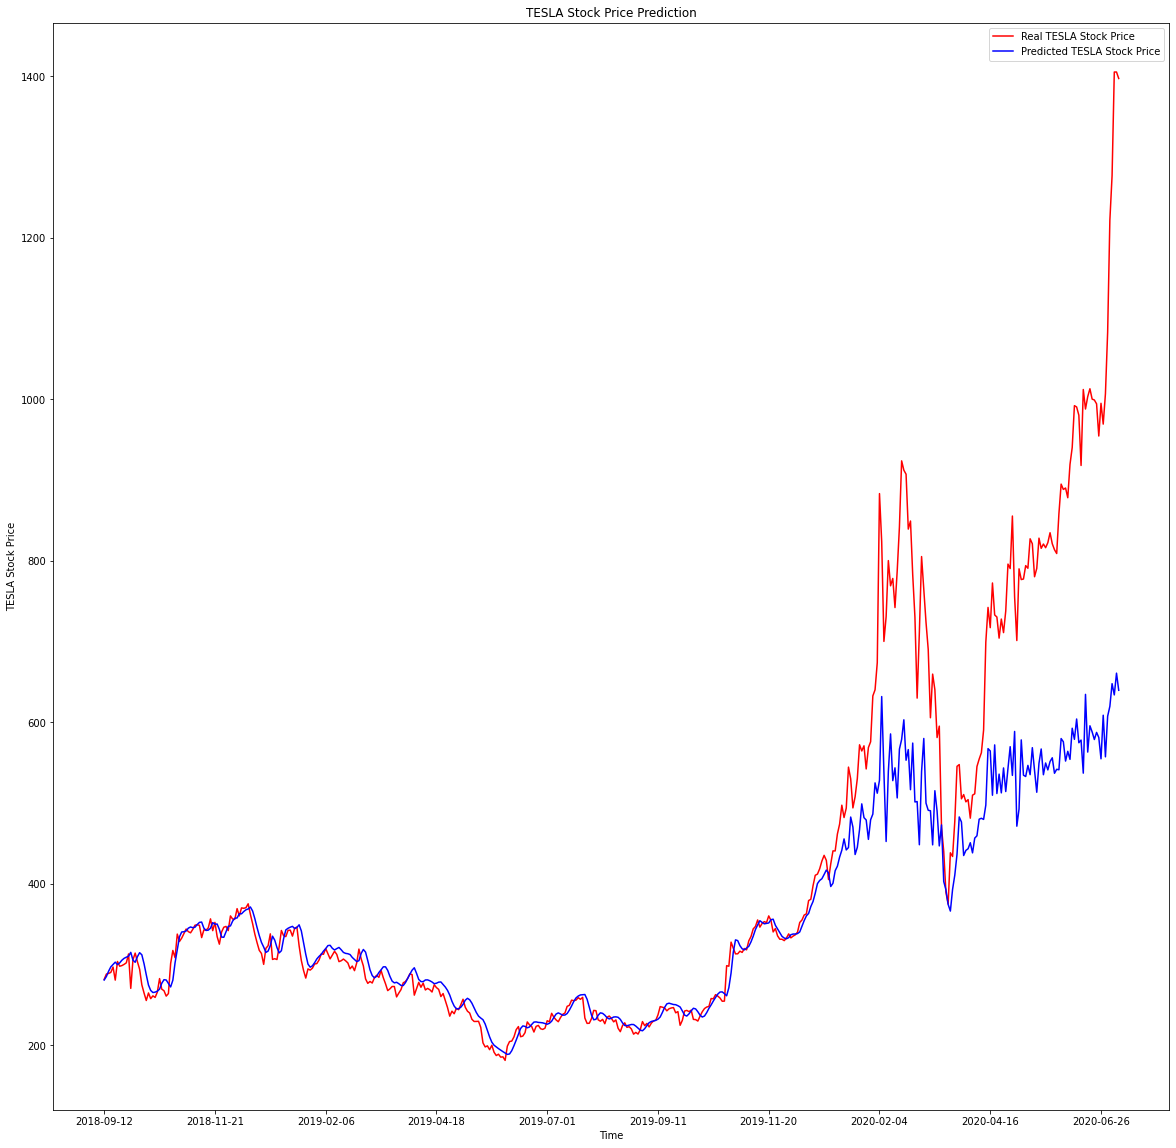

In [15]:
# Visualising the results
plt.figure(figsize=(20,20))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()